## 1. Polish Sign Language (PSL); Polski Język Migowy (PJM)
<p>Polish Sign Language (PSL) is the primary language used by deaf individuals in Poland. It is used by hearing as well as hard-of-hearing individuals.
</p>The language is as rich as spoken languages and employs signs made with the hand, along with facial gestures and bodily postures.</p>
<p><img src="http://phavi.umcs.pl/ph/r,1200,630/agicon/c/2022/0331/586557462456be4eb3a5.png" alt="polish sign language"></p>
<p> Developing computer vision systems relies on complex neural network architectures that can detect subtle patterns in streaming video or images.</p>
<p><strong>In this notebook</strong>, I will train a <strong>convolutional neural network</strong> to classify images of Polish Sign Language (PSL) letters.  After loading, examining, and preprocessing the data, we will train the network and test its performance.</p>
<p>In the code cell below, we load the training and test data. </p>

## 1. Load the data

The first step in any data set project is to load it.
In order to unpack the photos of gestures, I used the "os" and "cv2" libraries.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

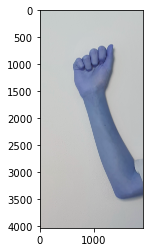

In [7]:
DATADIR = 'C:/Users/thesz/Documents/zdjecia'
CATEGORIES = ['A','B','C','CZ','D','E','F','G','H','L','M','N','O','P','R','S','T','U','W','Y']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to A
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

Images are represented as <strong>numpy arrays</strong>. Single-channel as well as grayscale images are matrix of pixel intensities of shape <strong>(row, column)</strong>.<p>
We can construct a 3D volume as a series of 2D planes, giving 3D images the shape <strong>(plane, row, column)</strong>.<p> 
Multichannel data adds a channel dimension in the final position containing color information. Colors are coded in RGB system.

In [8]:
print(img_array[0])

[[198 204 203]
 [198 204 203]
 [198 204 203]
 ...
 [197 202 201]
 [197 202 201]
 [196 201 200]]


### Standarization of images
Making images same size.

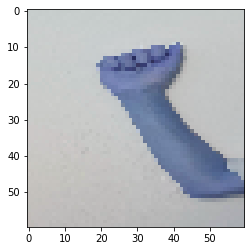

In [9]:
IMG_SIZE = 60
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
data_to_split = []
def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                data_to_split.append([new_array, class_num])
            except Exception as e:
                pass
create_data()

In [11]:
import random
random.shuffle(data_to_split)

In [12]:
for sample in data_to_split[:10]:
    print(sample[1]) #How labels look like

9
16
5
0
8
15
19
14
9
9


In [13]:
X = []; y = []
for features, label in data_to_split:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

### Saving data in pickle

In [14]:
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

## 2. Visualize the training data
<p>Now I will create a list of string-valued labels containing the letters that appear in the dataset.<p> 
After then, I visualize the first several images in the training data, along with their corresponding labels.</p>

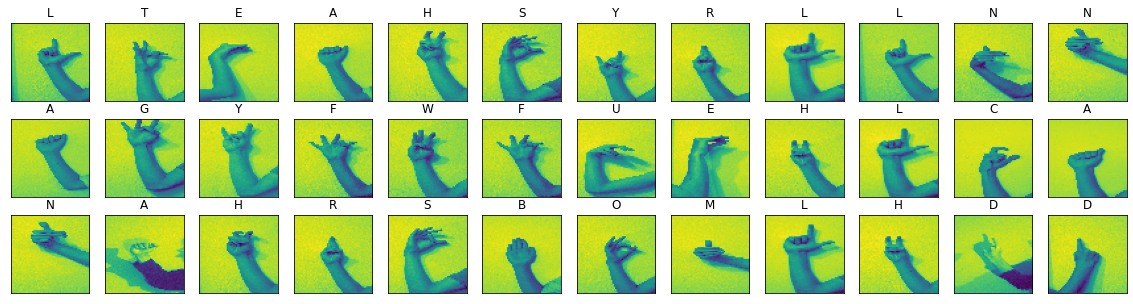

In [16]:
import matplotlib.pyplot as plt 
import numpy as np
labels = ['A','B','C','CZ','D','E','F','G','H','L','M','N','O','P','R','S','T','U','W','Y']

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X[i]))
    ax.set_title("{}".format(labels[y[i]]))
plt.show()

## 4. Splitting dataset to train dataset and test dataset

In [17]:
from sklearn.model_selection import train_test_split

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X/255.0
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=123,
                                                   stratify=y)

### One-hot encode the data
<p>Currently, our labels for each of the letters are encoded as categorical integers, where <code>'A'</code>, <code>'B'</code>, <code>'C'</code>,... are encoded as <code>0</code>, <code>1</code>, <code>2</code>... respectively.<p> 
Recall that Keras models do not accept labels in this format, and I have to first <strong> one-hot encode </strong> the labels before supplying them to a Keras model.</p>

In [18]:
from keras.utils import np_utils

# One-hot encode the training labels
y_train_OH = np_utils.to_categorical(y_train, 20)

# One-hot encode the test labels
y_test_OH = np_utils.to_categorical(y_test, 20)

## 5. Define the model
<p>Now I'll define a convolutional neural network to classify the data.This network accepts an image of an Polish Sign Language letter as input.<p> 
<strong>The output layer returns the network's predicted probabilities that the image belongs in each category.</strong></p>

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64, kernel_size=3, input_shape= X.shape[1:], activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(20, activation = 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 20)               

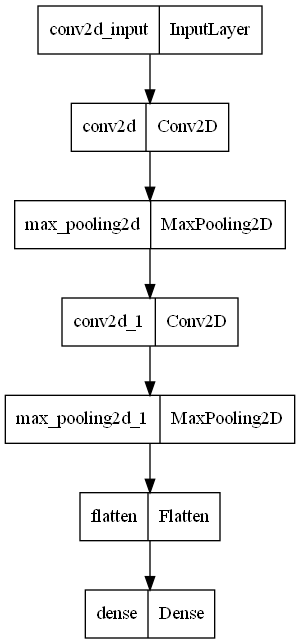

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model)

## 6. Compile the model
<p>I have defined a neural network in Keras, the next step is to compile it. </p>

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 7. Train the model
<p>Once I have compiled the model, I am ready to fit it to the training data.</p>

In [26]:
model.fit(X_train,y_train_OH,
          epochs=3,
          batch_size=25,
         validation_split=0.2)

Epoch 1/3
40/40 [==============================] - 8s 158ms/step - loss: 2.9938 - accuracy: 0.0621 - val_loss: 2.9093 - val_accuracy: 0.1992
Epoch 2/3
40/40 [==============================] - 6s 152ms/step - loss: 2.4249 - accuracy: 0.3957 - val_loss: 1.4747 - val_accuracy: 0.6220
Epoch 3/3
40/40 [==============================] - 6s 152ms/step - loss: 0.9038 - accuracy: 0.7925 - val_loss: 0.5012 - val_accuracy: 0.8902


## 8. Test the model
<p>To evaluate the model, we'll use the test dataset.  This will tell us how the network performs when classifying images it has never seen before!</p>
<p>If the classification accuracy on the test dataset is similar to the training dataset, this is a good sign that the model did not overfit to the training data.  </p>

In [27]:
score = model.evaluate(x=X_test, 
                       y=y_test_OH,
                       verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8961039185523987


The accuracy on the test dataset is similar to training dataset, which means that the model didn't overfit to the training data!